In [21]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import GetData

Here is a description of the data frame dt1 and number of lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Site             4713 non-null   category
 1   Transect_ID      4713 non-null   category
 2   Start_X          4713 non-null   int64   
 3   Start_Y          4713 non-null   int64   
 4   End_X            4713 non-null   int64   
 5   End_Y            4713 non-null   int64   
 6   Early_Date       4713 non-null   int16   
 7   Last_Date        4713 non-null   int16   
 8   EPR              4713 non-null   float64 
 9   EPR_Error        4713 non-null   float64 
 10  LRR_slope        4713 non-null   float64 
 11  LRR_Rsquared     4713 non-null   float64 
 12  Early_to_Middle  4657 non-null   float64 
 13  Early_to_End     4633 non-null   float64 
 14  Middle_to_End    4645 non-null   float64 
 15  Channel_Order    4713 no

## Loading the image

In [2]:
marsh = cv.imread('plum_raw.jpg')

In [3]:
#playing around
recolor_marsh = cv.cvtColor(marsh, cv.COLOR_BGR2RGB)   # BGR -> RGB
cv.imwrite('recolor_marsh.png', recolor_marsh) 
print (type(marsh))

<class 'numpy.ndarray'>


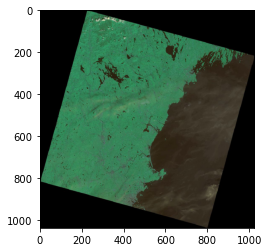

In [4]:
plt.imshow(marsh)

In [5]:
#no surprise - this has 3 channels (colors) each of which has a 1038 x 1024 array
marsh.shape

(1038, 1024, 3)

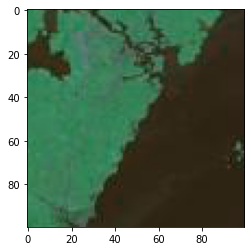

In [6]:
#zoom in on a much smaller chunk
marsh_middle = marsh[550:650,500:600,:]
plt.imshow(marsh_middle)

## Histogram 

Create a histogram for each color. We can see that there are two main spikes in red and green, probably due to differences between land and water, but blue pretty much just has one spike (or two spikes merged together). This suggests that a simple way is to just only use the red channel. 

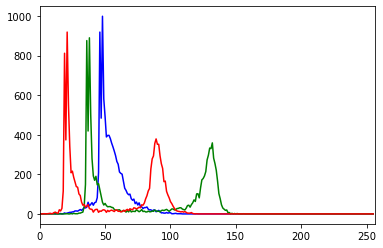

In [7]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([marsh_middle],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

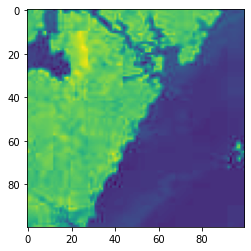

In [8]:
#we can also just plot in green, since things seem to be super well-separated there.
plt.imshow(marsh_middle[:,:,2])

## Using watershed transform to figure out the areas

In [9]:
#convert to grayscale
gray_marsh = cv.cvtColor(marsh_middle,cv.COLOR_BGR2GRAY)

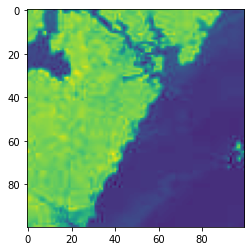

In [10]:
plt.imshow(gray_marsh)

In [11]:
ret, thresh = cv.threshold(gray_marsh,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

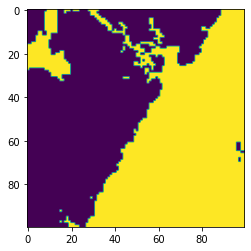

In [12]:
plt.imshow(thresh)

In [13]:
ret, markers = cv.connectedComponents(thresh)

In [15]:
#define 

markers = cv.watershed(marsh_middle,markers)
marsh_middle[markers == -1] = [255,0,0]

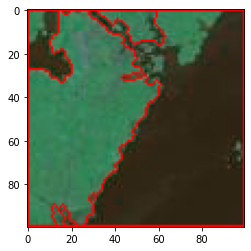

In [16]:
plt.imshow(marsh_middle)
#you can see that it's far from perfect - but pretty cool for something out of the box!

## Scratchwork

In [17]:
print(type(thresh))

<class 'numpy.ndarray'>


In [18]:
thresh.shape

(100, 100)

In [19]:
conts,hier = cv.findContours(thresh, 1,1)

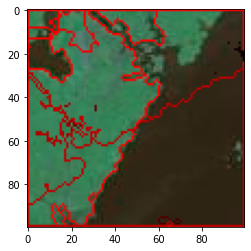

In [20]:
m = len(conts)
for i in range(m):
    for j in range(conts[i].shape[0]):
            #print(conts[i][j,0,0],conts[i][j,0,1])
            marsh_middle[conts[i][j,0,0],conts[i][j,0,1]] = [255*i/m,0,0]
plt.imshow(marsh_middle)

In [ ]:
conts[1].shape

In [ ]:
conts[1][10,0,0]

In [ ]:
marsh_middle[20,20]

In [ ]:
len(conts)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


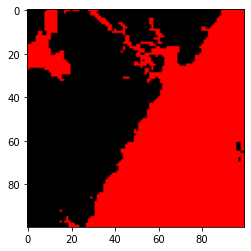

In [17]:
#make thresh into 3 channel image again 
thresh_3chan = np.zeros([100,100,3])
thresh_3chan[:,:,0] = thresh

thresh_3chan.shape
plt.imshow(thresh_3chan)

# Dataframes from Yiyang

In [22]:
dt1 = GetData.get_data()

In [23]:
dt1.describe

<bound method NDFrame.describe of      Site Transect_ID  Start_X  Start_Y   End_X    End_Y  Early_Date  \
0     GCE           1   464216  3478551  464140  3478618        1933   
1     GCE           2   464218  3478501  464104  3478573        1933   
2     GCE           3   464209  3478453  464128  3478514        1933   
3     GCE           4   464168  3478427  464124  3478473        1933   
4     GCE           5   464119  3478422  464111  3478452        1933   
...   ...         ...      ...      ...     ...      ...         ...   
4708  PIE        4709   351400  4732844  351338  4732820        1938   
4709  PIE        4710   351380  4732890  351331  4732874        1938   
4710  PIE        4711   351365  4732937  351302  4732922        1938   
4711  PIE        4712   351342  4732980  351287  4732966        1938   
4712  PIE        4713   351335  4733028  351294  4733011        1938   

      Last_Date   EPR  EPR_Error  LRR_slope  LRR_Rsquared  Early_to_Middle  \
0          2013  0.89  

In [38]:
# get just one location and time 

dt13 = dt1[dt1['Last_Date']==2013][dt1['Site']=='PIE']

In [39]:
dt13.describe

<bound method NDFrame.describe of      Site Transect_ID  Start_X  Start_Y   End_X    End_Y  Early_Date  \
3449  PIE        3450   350736  4736090  350705  4736081        1938   
3450  PIE        3451   350714  4736046  350689  4736036        1938   
3451  PIE        3452   350720  4735998  350699  4735989        1938   
3452  PIE        3453   350767  4735987  350742  4735962        1938   
3453  PIE        3454   350810  4735964  350799  4735942        1938   
...   ...         ...      ...      ...     ...      ...         ...   
4708  PIE        4709   351400  4732844  351338  4732820        1938   
4709  PIE        4710   351380  4732890  351331  4732874        1938   
4710  PIE        4711   351365  4732937  351302  4732922        1938   
4711  PIE        4712   351342  4732980  351287  4732966        1938   
4712  PIE        4713   351335  4733028  351294  4733011        1938   

      Last_Date   EPR  EPR_Error  LRR_slope  LRR_Rsquared  Early_to_Middle  \
3449       2013 -0.03  

In [40]:
dt13.head(10)

,Site,Transect_ID,Start_X,Start_Y,End_X,End_Y,Early_Date,Last_Date,EPR,EPR_Error,LRR_slope,LRR_Rsquared,Early_to_Middle,Early_to_End,Middle_to_End,Channel_Order
3449,PIE,3450,350736,4736090,350705,4736081,1938,2013,-0.03,0.05,-0.03,0.10,-0.07,-0.08,-0.10,2
3450,PIE,3451,350714,4736046,350689,4736036,1938,2013,0.04,0.05,0.04,0.95,0.04,-0.00,-0.05,2
3451,PIE,3452,350720,4735998,350699,4735989,1938,2013,-0.03,0.05,-0.03,0.79,0.04,-0.01,-0.06,2
3452,PIE,3453,350767,4735987,350742,4735962,1938,2013,-0.06,0.05,-0.06,0.59,0.03,-0.03,-0.09,2
3453,PIE,3454,350810,4735964,350799,4735942,1938,2013,0.05,0.05,0.05,0.93,0.04,-0.03,-0.11,2
3454,PIE,3455,350853,4735941,350849,4735916,1938,2013,0.04,0.05,0.04,0.40,-0.14,-0.03,0.07,2
3455,PIE,3456,350901,4735930,350905,4735907,1938,2013,0.03,0.05,0.03,0.99,-0.18,-0.03,0.12,2
3456,PIE,3457,350946,4735945,350959,4735926,1938,2013,-0.03,0.05,-0.03,0.42,-0.16,-0.06,0.05,2
3457,PIE,3458,350961,4735988,350984,4735972,1938,2013,-0.05,0.05,-0.05,0.91,-0.11,-0.06,-0.01,2
3458,PIE,3459,350961,4736038,350981,4736025,1938,2013,-0.01,0.05,-0.01,0.70,-0.23,-0.06,0.11,2


In [48]:
dt13[['End_X']].describe()

,End_X
count,1264.000000
mean,349802.657437
std,1003.507120
min,347305.000000
25%,349004.500000
50%,349921.500000
75%,350612.750000
max,351512.000000


In [49]:
dt13[['End_Y']].describe()

,End_Y
count,1.264000e+03
mean,4.733577e+06
std,1.493687e+03
min,4.731305e+06
25%,4.732350e+06
50%,4.733140e+06
75%,4.734918e+06
max,4.736249e+06


In [53]:
X_min = 347305
Y_min = 4731305
Y_tot = 4736249 - Y_min
X_tot = 351512 - X_min

In [94]:
pic = np.zeros([X_tot + 1, Y_tot + 1])

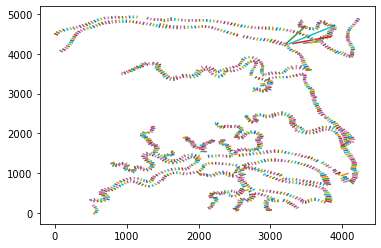

In [101]:
#xy = dt13[['End_X','End_Y']]
#for spot in xy:
#    pic[xy[0],xy[1]]=1
n = len(xy)
for i in range(n):
    x1 = dt13.iloc[i]['Start_X'] - X_min
    y1 = dt13.iloc[i]['Start_Y'] - Y_min
    
    x2 = dt13.iloc[i]['End_X'] - X_min
    y2 = dt13.iloc[i]['End_Y'] - Y_min
    
    #interpolate 
    
    plt.plot([x1,x2],[y1,y2])
    
    #for j in range(20):
    #    for k in range(20):
    #        pic[max(min(x + j, X_tot), 0),max((min(y + k, Y_tot), 0))]=1
    

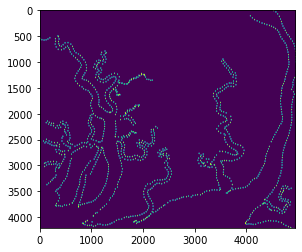

In [96]:
plt.imshow(pic)
plt.plot(line)

In [88]:
np.count_nonzero(pic)

31496

In [102]:
#uhh what we really want is a big list with all zipped together (I think)